## 1. Motivation

The idea of this notebook is to give step-by-step to convert a transit spectrum from transit depths in parts per million to scale-heights. We take the spectrum of WASP-39b as an example. Let's set first libraries will use first:

In [1]:
import numpy as np

# Plotting stuff:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

And let's load the dataset:

In [2]:
w, d, derr = np.loadtxt('wasp-39-R100.txt', unpack = True, usecols = (0, 1, 2))

## 2. Converting the spectra: from depths to planetary radii

The input spectra is in units of transit depths in parts-per-million:

(array([20500., 21000., 21500., 22000., 22500., 23000.]),
 [Text(0, 20500.0, '20500'),
  Text(0, 21000.0, '21000'),
  Text(0, 21500.0, '21500'),
  Text(0, 22000.0, '22000'),
  Text(0, 22500.0, '22500'),
  Text(0, 23000.0, '23000')])

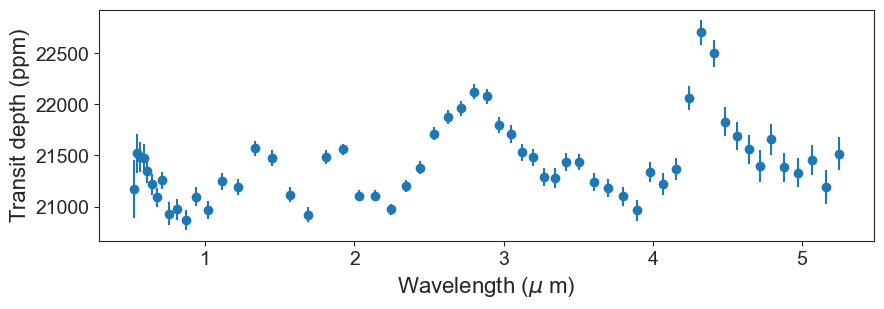

In [3]:
plt.figure( figsize = (10,3) )

plt.errorbar(w, d, derr, fmt = 'o')

plt.xlabel('Wavelength ($\mu$ m)', fontsize = 16)
plt.ylabel('Transit depth (ppm)', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

The very first step is to conver these depths in parts-per-million to "normal" depths. To this end, we multiply by $10^{-6}$ to convert from parts-per-million to simple transit depths in relative flux units:

In [4]:
transit_depths, transit_depths_err = d * 1e-6, derr * 1e-6

(array([0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 ]),
 [Text(0, 0.0205, '0.0205'),
  Text(0, 0.021, '0.0210'),
  Text(0, 0.021500000000000002, '0.0215'),
  Text(0, 0.022000000000000002, '0.0220'),
  Text(0, 0.0225, '0.0225'),
  Text(0, 0.023, '0.0230')])

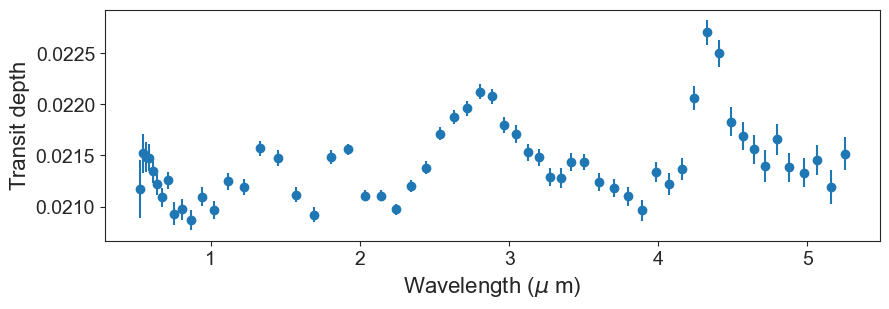

In [5]:
plt.figure( figsize = (10,3) )

plt.errorbar(w, transit_depths, transit_depths_err, fmt = 'o')

plt.xlabel('Wavelength ($\mu$ m)', fontsize = 16)
plt.ylabel('Transit depth', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Great. Next, we convert the transit depths to planet-to-star radius ratio noting that, as a good approximation,

$\textnormal{Transit depth} = \left(\frac{R_p}{R_*}\right)^2$,

then,

$R_p = \sqrt{\textnormal{Transit depth}} \times R_*$,

where $R_p$ is the radius of the planet and $R_*$ is the radius of the star. For WASP-39b, we use $R_* = 0.939 R_\odot$ from [Mancini et al. (2018)](https://exoplanetarchive.ipac.caltech.edu/overview/WASP-39), which translates to, with $R_\odot = 696,340$ km, to $R_* = 653,863.26$. 

And "additional" complication is to estimate the error on that planetary radius as a function of radius given the error on the transit depth. To do this, we use the [delta-method](https://en.wikipedia.org/wiki/Delta_method) for error propagation --- in our case, this gives:

$\frac{d R_p}{d \textnormal{Transit depth}} = \frac{R_*}{2 \sqrt{\textnormal{Transit depth}}} \rightarrow \sigma_{R_p} = \sigma_{\textnormal{Transit depth}} \times \left( \frac{R_*}{2 \sqrt{\textnormal{Transit depth}}} \right)$ 

Let's apply this:

In [6]:
Rstar = 653863.26

Rp, Rp_err = np.sqrt(transit_depths) * Rstar, transit_depths_err * (Rstar / (2. * np.sqrt(transit_depths)))

(array([ 94000.,  95000.,  96000.,  97000.,  98000.,  99000., 100000.]),
 [Text(0, 94000.0, '94000'),
  Text(0, 95000.0, '95000'),
  Text(0, 96000.0, '96000'),
  Text(0, 97000.0, '97000'),
  Text(0, 98000.0, '98000'),
  Text(0, 99000.0, '99000'),
  Text(0, 100000.0, '100000')])

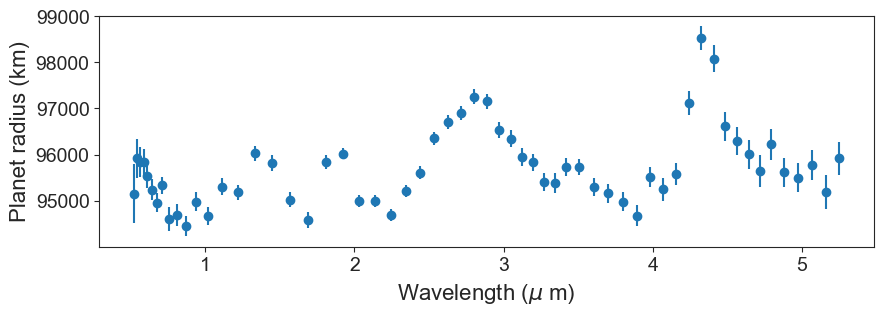

In [7]:
plt.figure( figsize = (10,3) )

plt.errorbar(w, Rp, Rp_err, fmt = 'o')

plt.xlabel('Wavelength ($\mu$ m)', fontsize = 16)
plt.ylabel('Planet radius (km)', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

## 3. From planetary radii to scale-heights

The next step is to convert the above to planetary scale-heights. To do this, we need to first calculate the _actual_ planetary scale-height. The [definition of the scale-height is given by](https://en.wikipedia.org/wiki/Scale_height) (see a motivation/derivation [here](https://randomastronomy.wordpress.com/)):

$H_p = \frac{k_B T_p}{m g_p}.$

Here, 

- $k_B = 1.381 \times 10^{−23} J\cdot K^{-1}$ is Boltzmann's constant,
- $T_p$ is the temperature of the planetary atmosphere (which we'll assume is [the equilibrium temperature of 1166 K](https://exoplanetarchive.ipac.caltech.edu/overview/WASP-39)),
- $m$ the mass of the constituents in the atmosphere (which we'll assume $m = 2.3 m_p = 2.3 \times (2 \times 10^{-27} \textnormal{kg})$, where $m_p = 2 \times 10^{-27}$ kg is the mass of the proton), and,
- $g_p$ is the planetary gravity (which for a radius of $1.27 R_J$ and a mass of $0.28 M_J$ gives a gravity of $g_p = 4.3$ m/s$^2$).

For WASP-39b, this gives:

$H_p = 839.63\ \textnormal{km}$.

We then formed the "standardized" transmisson spectrum by subtracting the mean planetary radius and dividing by the scale-height, which gives:

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

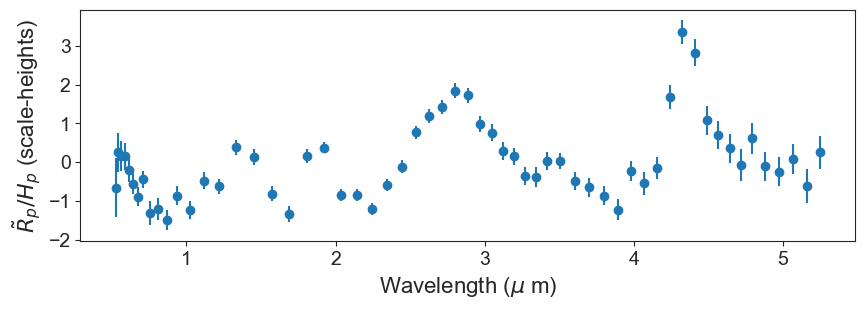

In [8]:
mean_radius = np.nanmean(Rp) # km
Hp = 839.63 # km

plt.figure( figsize = (10,3) )

plt.errorbar(w, (Rp - mean_radius) / Hp, Rp_err / Hp, fmt = 'o')

plt.xlabel('Wavelength ($\mu$ m)', fontsize = 16)
plt.ylabel(r'$\tilde{R}_p / H_p$ (scale-heights)', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

As we can see, from these results, the features in WASP-39~b span a few scale-heights --- with the biggest features happening at 3 microns (H$_2$O) with an amplitude of about 2 scale-heights, and the CO$_2$ feature at 4.3$\mu$m having an amplitude of about 4 total scale-heights (note the minimum scale height above is about -1).